In [1]:
import os, sys
from glob import glob
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Load plot style

from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


# Plot of Power Spectrum Scheme

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-pack

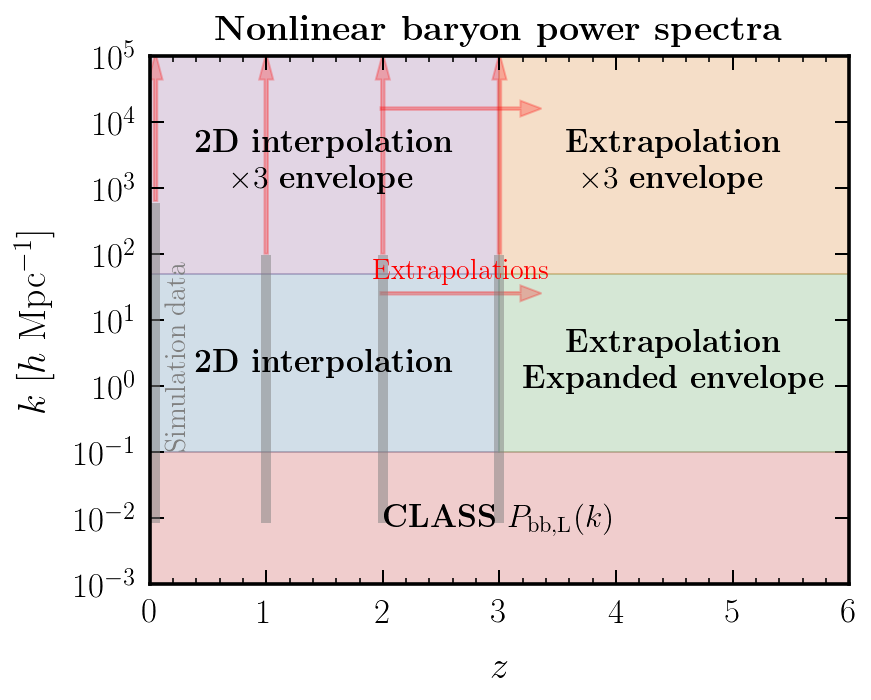

In [3]:
import matplotlib.patches as patches

plt.figure(figsize=(8 / 1.3, 6.5 / 1.3))

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$k$ [$h$ Mpc$^{-1}$]')

rect_CLASS = patches.Rectangle(
    (0., 1e-3), 6., 0.1 - 1e-3, linewidth=1, edgecolor=cols_default[0], facecolor=cols_default[0], alpha=0.25
)
rect_2D_interp_envelope = patches.Rectangle(
    (0., 0.1), 3., 50. - 0.1, linewidth=1, edgecolor=cols_default[1], facecolor=cols_default[1], alpha=0.25
)
rect_2D_extrap_envelope = patches.Rectangle(
    (3., 0.1), 3., 50. - 0.1, linewidth=1, edgecolor=cols_default[2], facecolor=cols_default[2], alpha=0.25
)
rect_2D_interp_fixed_bias = patches.Rectangle(
    (0., 50.), 3., 1e5 - 50., linewidth=1, edgecolor=cols_default[3], facecolor=cols_default[3], alpha=0.25
)
rect_2D_extrap_fixed_bias = patches.Rectangle(
    (3., 50.), 3., 1e5 - 50., linewidth=1, edgecolor=cols_default[4], facecolor=cols_default[4], alpha=0.25
)

ax = plt.gca()

ax.add_patch(rect_CLASS)
ax.add_patch(rect_2D_interp_envelope)
ax.add_patch(rect_2D_extrap_envelope)
ax.add_patch(rect_2D_interp_fixed_bias)
ax.add_patch(rect_2D_extrap_fixed_bias)

plt.plot([0.05, 0.05], [0.01, 500], linewidth=5, color='gray', alpha=0.5)
plt.plot([1, 1], [0.01, 80],  linewidth=5,  color='gray', alpha=0.5)
plt.plot([2, 2], [0.01, 80],  linewidth=5,  color='gray', alpha=0.5)
plt.plot([3, 3], [0.01, 80],  linewidth=5,  color='gray', alpha=0.5)
# plt.plot([0.05, 0.05], [500, 1e5],  linewidth=5, color='gray', alpha=0.5, linestyle='dotted')
# plt.plot([1, 1], [80,  1e5],  linewidth=5,  color='gray', alpha=0.5, linestyle='dotted')
# plt.plot([2, 2], [80,  1e5],  linewidth=5,  color='gray', alpha=0.5, linestyle='dotted')
# plt.plot([3, 3], [80,  1e5],  linewidth=5,  color='gray', alpha=0.5, linestyle='dotted')

plt.arrow(0.33, 0.55, 0.2, 0.00, width=0.005, head_width=0.03, head_length=0.03, color='red', alpha=0.25, transform=ax.transAxes)
plt.arrow(0.33, 0.90, 0.2, 0.00, width=0.005, head_width=0.03, head_length=0.03, color='red', alpha=0.25, transform=ax.transAxes)

plt.arrow(0.0085, 0.725, 0.0, 0.23, width=0.005, head_width=0.02, head_length=0.05, color='red', alpha=0.25, transform=ax.transAxes)
plt.arrow(0.1667, 0.625, 0.0, 0.33, width=0.005, head_width=0.02, head_length=0.05, color='red', alpha=0.25, transform=ax.transAxes)
plt.arrow(0.3333, 0.625, 0.0, 0.33, width=0.005, head_width=0.02, head_length=0.05, color='red', alpha=0.25, transform=ax.transAxes)
plt.arrow(0.5000, 0.625, 0.0, 0.33, width=0.005, head_width=0.02, head_length=0.05, color='red', alpha=0.25, transform=ax.transAxes)


plt.text(0.50, 0.10, r'\textbf{CLASS} $P_{\mathrm{bb,L}}(k)$',             fontsize=16, horizontalalignment='center', transform=ax.transAxes)
plt.text(0.25, 0.40, r'\textbf{2D interpolation}',                         fontsize=16, horizontalalignment='center', transform=ax.transAxes)
plt.text(0.75, 0.37, r'\textbf{Extrapolation}'+'\n'+r'\textbf{Expanded envelope}',       fontsize=16, horizontalalignment='center', transform=ax.transAxes)
plt.text(0.25, 0.75, r'\textbf{2D interpolation}'+'\n'+r'$\times 3$ \textbf{envelope}', fontsize=16, horizontalalignment='center', transform=ax.transAxes)
plt.text(0.75, 0.75, r'\textbf{Extrapolation}'+'\n'+r'$\times 3$ \textbf{envelope}',   fontsize=16, horizontalalignment='center', transform=ax.transAxes)

plt.text(0.02, 0.43, 'Simulation data', fontsize=14, verticalalignment='center', rotation='vertical', color='gray', transform=ax.transAxes)
plt.text(0.32, 0.59, 'Extrapolations', fontsize=14, verticalalignment='center', color='red', transform=ax.transAxes)

plt.title(r'\textbf{Nonlinear baryon power spectra}')

plt.axis([0., 6., 1e-3, 1e5])

from matplotlib import ticker

locmaj = ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = ticker.LogLocator(base=10.0, numticks=24)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.tight_layout()

plt.savefig('../paper/draft-formalism/plots/nonlin_baryon_PS_scheme.pdf')